# Apple Stock Price Prediction 
## Step 3 Exploratory Data Analysis (EDA)
Conduct EDA on Apple historical stock data to examine relationships between variables and other patterns in the data.

## Data Loading

In [6]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
%matplotlib inline

# to ignore warning message

import warnings
warnings.filterwarnings('ignore')

### Load the data from the csv file

In [7]:
# load the CSV data file
df=pd.read_csv('data/apple_stockdata_wrangled.csv',index_col=0)
df.head(5)

,year,date,open,high,low,close,close_adjusted,volume,split_coefficient,release_time,qtr,eps_est,eps,dividend
0,1998,1998-01-02,13.63,16.25,13.50,16.25,0.5103,6411700,1.0,NaN,NaN,NaN,NaN,NaN
1,1998,1998-01-05,16.50,16.56,15.19,15.88,0.4987,5820300,1.0,NaN,NaN,NaN,NaN,NaN
2,1998,1998-01-06,15.94,20.00,14.75,18.94,0.5948,16182800,1.0,NaN,NaN,NaN,NaN,NaN
3,1998,1998-01-07,18.81,19.00,17.31,17.50,0.5496,9300200,1.0,NaN,NaN,NaN,NaN,NaN
4,1998,1998-01-08,17.44,18.62,16.94,18.19,0.5713,6910900,1.0,NaN,NaN,NaN,NaN,NaN


**<font color='teal'> Print out the summary stats table transposed to fit on the screen.</font>**

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,10894.0,2.012216e+03,6.061967e+00,1998.0000,2.008000e+03,2.014000e+03,2.017000e+03,2.020000e+03
open,10894.0,1.903585e+02,1.555894e+02,12.9900,9.700875e+01,1.393900e+02,2.165550e+02,7.024100e+02
high,10894.0,1.922518e+02,1.568592e+02,13.1900,9.802370e+01,1.407501e+02,2.195000e+02,7.050700e+02
low,10894.0,1.884070e+02,1.542123e+02,12.7200,9.577750e+01,1.387000e+02,2.139788e+02,6.995700e+02
close,10894.0,1.903604e+02,1.555302e+02,13.1200,9.703000e+01,1.397800e+02,2.160200e+02,7.021000e+02
close_adjusted,10894.0,9.154747e+01,7.207272e+01,0.4987,1.965955e+01,9.099960e+01,1.439052e+02,3.272000e+02
volume,10894.0,2.703204e+07,1.970383e+07,648827.0000,1.269235e+07,2.358174e+07,3.588962e+07,1.895606e+08
split_coefficient,10894.0,1.002387e+00,1.157472e-01,1.0000,1.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00
eps_est,7623.0,2.076536e+00,8.560027e-01,0.4500,1.450000e+00,1.970000e+00,2.600000e+00,4.547000e+00
eps,7623.0,2.166019e+00,8.900484e-01,0.4500,1.440000e+00,2.070000e+00,2.730000e+00,4.990000e+00


## Insights into Numerical data

Lets plot all the variables in the data set with respect to date data

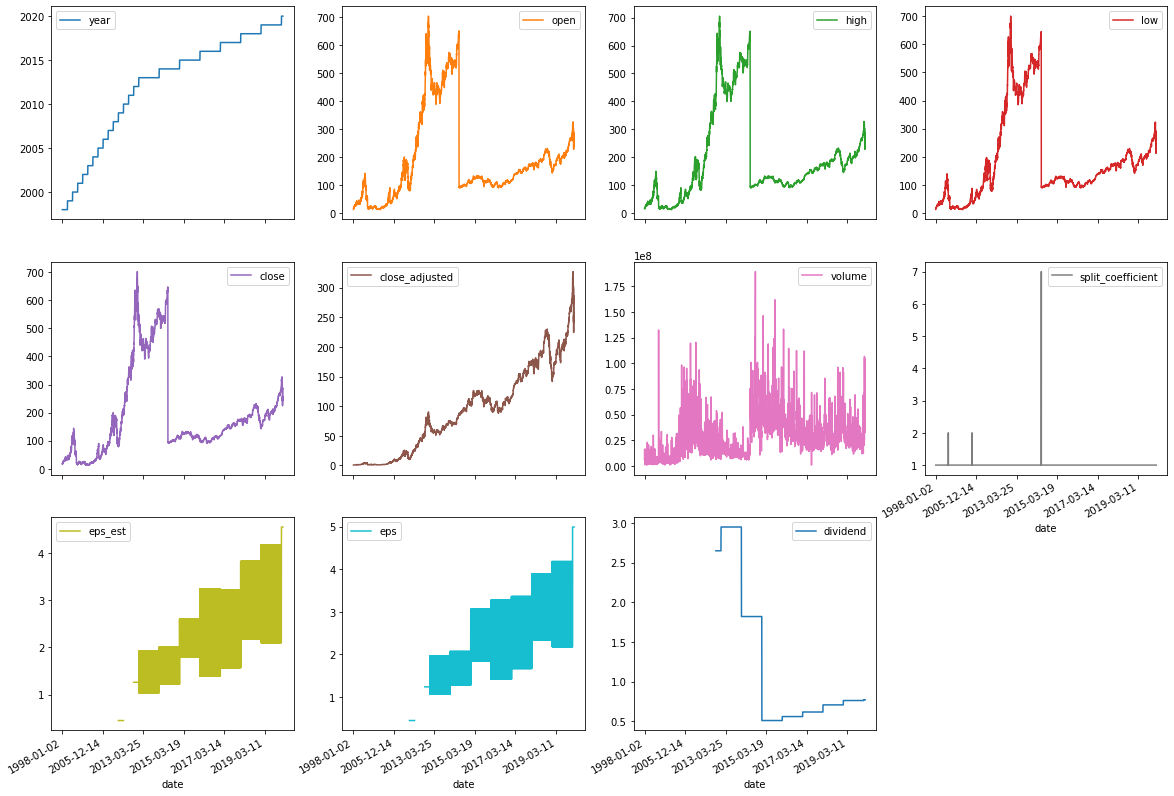

In [9]:
df.plot(x='date',subplots = True,layout=(4,4),sharey=False, sharex=True, figsize=(20,20))
plt.show()

Couple of observations:
- Very similar trends were seen with the high, low, open, close stock price variables. Seasonality is seen in the form of non-smoothness in the plots.
- Adjusted close price kept increasing with couple of bumps with seasonality
- High split coefficient seen near 2015 year, which signaled price reduction and it was not wrong. This is seen in the sharp price drop for all the price variables
- Downward trend with two distinct region seen in the stock volume plot. the peaks are marked by three peaks in split_coefficient. Seasonality is also suspected here
- Dividend progressed with a decreasing trend. lowest point marked by the sharp price fall. till then it progressed with steady increasing trend
- 'eps' showed increased trend with seasonal fluctuations and seasonality

## Stock Price Seasonal Variation
It would be insightful to check on the closing price by weekday, week of the month, month and quarterly basis

### 1. Weekdays
- Stock market is open on Weekdays only (Monday to Friday)
- Closing price will be grouped by day of the week and taken 'median' over the years. Median was chosen over mean because, it will put more emphasis on regular prices and less on unusual time such an economic down turn's

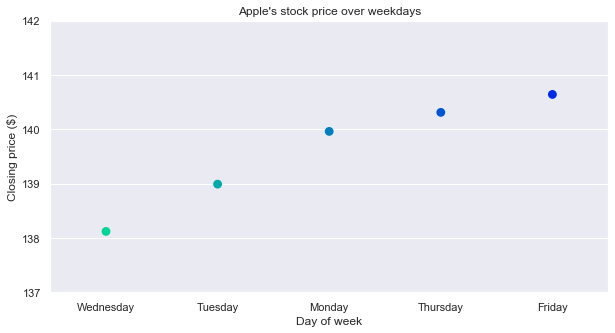

In [10]:
# Take median price on a particular day, over the years

df.date = pd.to_datetime(df.date)
df.set_index('date',inplace=True)
df['Day_name']=df.index.day_name()
df_dayofweek = df.groupby(['Day_name'])['close'].median().sort_values()


# plot stock closing price over Monday to Friday

plt.figure(figsize=(10,5))
sns.set(style = "darkgrid")

ax = sns.pointplot(
    x=df_dayofweek.index, 
    y=df_dayofweek, 
    df=df_dayofweek, 
    join=False, 
    palette='winter_r')

ax.set(ylim=(137,142))
ax.set_xlabel("Day of week")
ax.set_ylabel("Closing price ($)")
plt.title("Apple's stock price over weekdays")
plt.show()

- In a week, Friday saw highest average closing price, whereas Wednesday saw the lowest

### 2. Week of a month
- Historically, which week of the month saw the largest closing price
- Closing price will be grouped by week of the month and taken 'median' over the years. Median was chosen 

In [11]:
# First, find out the 'week of the month' data from the folloing function

def week_of_month(date):
    month = date.month
    week = 0
    while date.month == month:
        week += 1
        date -= timedelta(days=7)

    return week
df['Day']=df.index
df['Week_of_month'] = df['Day'].apply(week_of_month)
df['Week_of_month'] = 'Week ' + df['Week_of_month'].astype(str)   # Week 1 to Week5


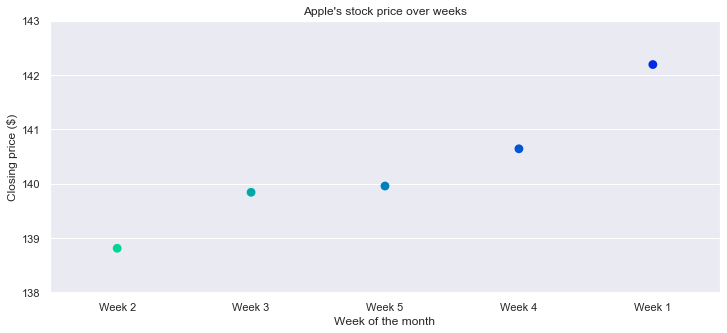

In [12]:
# Take median closing price grouped by 'week of month' over the years

df_Week_of_month = df.groupby(['Week_of_month'])['close'].median().sort_values()
df_Week_of_month=df_Week_of_month.to_frame()

# plot stock closing price grouped by 'week of the month'

plt.figure(figsize=(12,5))
sns.set(style = "darkgrid")

ax = sns.pointplot(
    x=df_Week_of_month.index.values,
    y=df_Week_of_month.close.values,
    data=df_Week_of_month,  
    palette='winter_r')

ax.set(ylim=(138,143))
ax.set_xlabel("Week of the month")
ax.set_ylabel("Closing price ($)")
plt.title("Apple's stock price over weeks")
plt.show()


- In a month, on median measure, week 1 saw the biggest closing price whereas the next week of week 1 (week 2) saw the lowest price

### 3. Monthly
- Historically, which month of the year saw the largest closing price
- Closing price will be grouped by day of the week and taken 'median' over the years

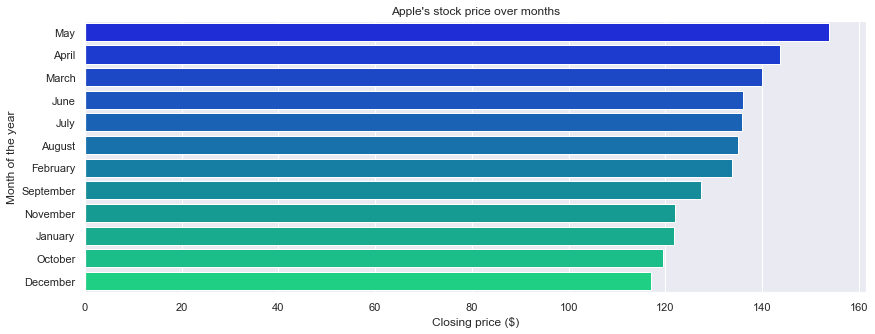

In [14]:
# Take median closing price on a particular month over the years


df['Month_name']=df.index.month_name()
df_monthly = df.groupby(['Month_name'])['close'].median().sort_values(ascending=False)
df_monthly=df_monthly.to_frame()


# plot stock closing price month of the year

plt.figure(figsize=(14,5))
sns.set(style = "darkgrid")

ax = sns.barplot(
    y=df_monthly.index.values,
    x=df_monthly.close.values,
    data=df_monthly,  
    palette='winter')

ax.set_ylabel("Month of the year")
ax.set_xlabel("Closing price ($)")
plt.title("Apple's stock price over months")
plt.show()



- Month of May saw the highest closing price whereas December saw the lowest 

### 4. Qarterly
- Historically, which quarter of the year saw the largest closing price
- Closing price will be grouped by quarter of the year and taken 'median' over the years

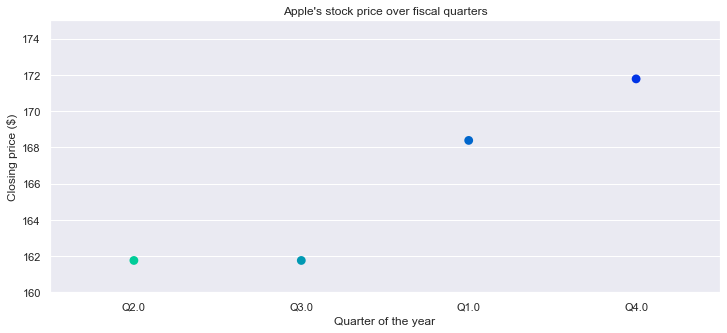

In [15]:
# Take median closing price grouped by quarter of the year over the years

df_quarter = df.groupby(['qtr'])['close'].median().sort_values()
df_quarter=df_quarter.to_frame()

# plot stock closing price grouped by 'quarter of the month'

plt.figure(figsize=(12,5))
sns.set(style = "darkgrid")

ax = sns.pointplot(
    x=df_quarter.index.values,
    y=df_quarter.close.values,
    data=df_quarter,  
    palette='winter_r')

ax.set(ylim=(160, 175))
ax.set_xlabel("Quarter of the year")
ax.set_ylabel("Closing price ($)")
plt.title("Apple's stock price over fiscal quarters")
plt.show()

## Stock Price Change
Stock price change (%) over a time duration is a good measure of how investement is growing. Three time durations will be observed:
- Monthly
- Quarterly

### Monthly

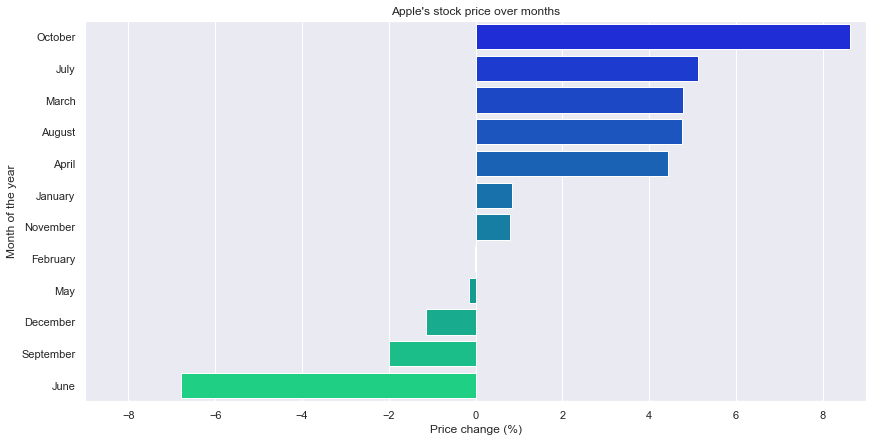

In [16]:
# Monthly price change in (%)
# Sampling price data by month (M) and then taking the 'first' and 'last' price and measure the change

monthly_return = df['close'].resample('M').agg(lambda x: 100*(x[-1]/x[1]-1))
monthly_return=monthly_return.to_frame()
month_name=monthly_return.index.month_name()
monthly_return.reset_index(inplace=True)
monthly_return['Month_name']=month_name
monthly_return = monthly_return.groupby(['Month_name'])['close'].mean().sort_values(ascending=False)
monthly_return=monthly_return.to_frame()

# plot stock's price change (%) over months

plt.figure(figsize=(14,7))
sns.set(style = "darkgrid")

ax = sns.barplot(
    y=monthly_return.index.values,
    x=monthly_return.close.values,
    data=monthly_return,  
    palette='winter')

ax.set(xlim=(-9,9))
ax.set_ylabel("Month of the year")
ax.set_xlabel("Price change (%)")
plt.title("Apple's stock price over months")
plt.show()

- Apples share holders saw biggest return over the month of October and lowest return in June

### Quarterly

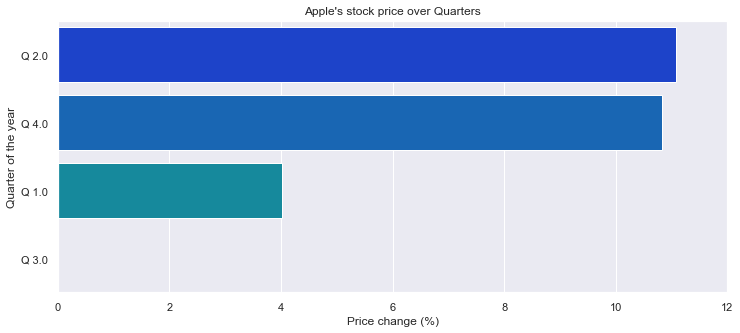

In [17]:
# Quarterly price change in (%)
# Sampling price data by fiscal quarters (3M) and then taking the 'first' and 'last' price to measure the change or return

quarterly_return = df['close'].resample('3M').agg(lambda x: 100*(x[-1]/x[1]-1))
quarterly_return=quarterly_return.to_frame()
quarter=np.ceil(pd.DatetimeIndex(quarterly_return.index).month/3)
quarterly_return.reset_index(inplace=True)
quarterly_return['quarter']=quarter
quarterly_return['quarter'] = 'Q ' + quarterly_return['quarter'].astype(str)   # Q1, Q2, Q3, Q4 
quarterly_return = quarterly_return.groupby(['quarter'])['close'].mean().sort_values(ascending=False)
quarterly_return=quarterly_return.to_frame()

# plot stock's price change (%) over quarters

plt.figure(figsize=(12,5))
sns.set(style = "darkgrid")

ax = sns.barplot(
    y=quarterly_return.index.values,
    x=quarterly_return.close.values,
    data=quarterly_return,  
    palette='winter')

ax.set(xlim=(0,12))
ax.set_ylabel("Quarter of the year")
ax.set_xlabel("Price change (%)")
plt.title("Apple's stock price over Quarters")
plt.show()

- Second quarter of the year saw the biggest return (%) whereas third quarter saw the minimal (%) return

## Earning per Share (EPS) over the Quarters
- EPS is a reflection of how much revenue the company is generating with the share holders money
- It will be explored in which quarter, Apple performed well in terms of EPS

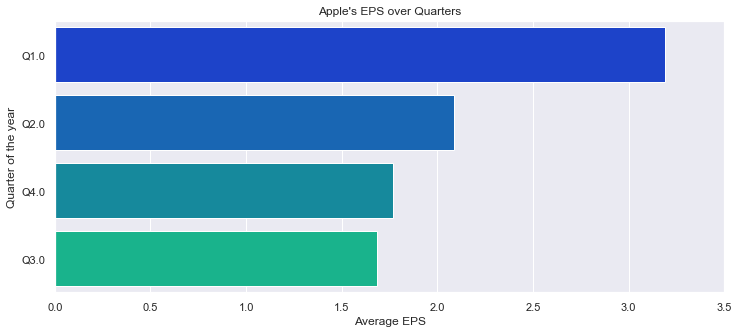

In [18]:
# eps over quarters

df_eps_quarter = df.groupby(['qtr'])['eps'].mean().sort_values(ascending=False)  # taking average
df_eps_quarter = df_eps_quarter.to_frame()
df_eps_quarter.reset_index(inplace=True)

# plot EPS over quarters

plt.figure(figsize=(12,5))
sns.set(style = "darkgrid")

ax = sns.barplot(
    y=df_eps_quarter.qtr.values,
    x=df_eps_quarter.eps.values,
    data=df_eps_quarter,  
    palette='winter')

ax.set(xlim=(0,3.5))
ax.set_ylabel("Quarter of the year")
ax.set_xlabel("Average EPS")
plt.title("Apple's EPS over Quarters")
plt.show()

- Apple showed best economic performance in the first quarter (Q1). After the Christmas big sale this jump makes sense.

## Traded Volume over Months
- Traded volume data often over looked while dealing with stock market analysis. Given the availability of time-series volume data, monthly variation of volume over years will be displayed


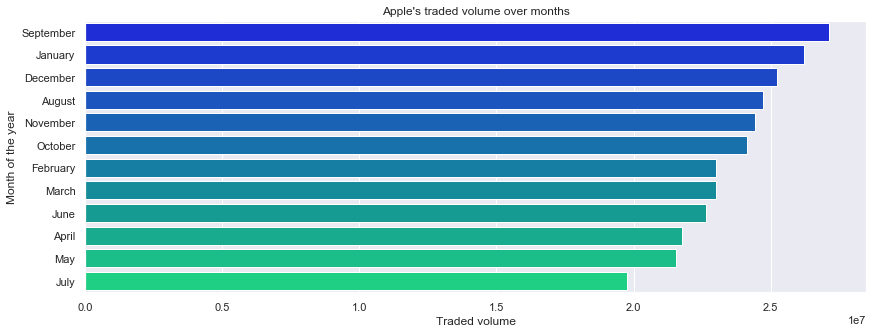

In [19]:
# Traded volume over months

volume_month = df.groupby(['Month_name'])['volume'].median().sort_values(ascending=False)
volume_month=volume_month.to_frame()


# plot traded volume by months

plt.figure(figsize=(14,5))
sns.set(style = "darkgrid")

ax = sns.barplot(
    y=volume_month.index.values,
    x=volume_month.volume.values,
    data=volume_month,  
    palette='winter')

ax.set_ylabel("Month of the year")
ax.set_xlabel("Traded volume")
plt.title("Apple's traded volume over months")
plt.show()

- Highest traded month is September whereas lowest is July. Looking into the highest closing price month, it is May and lowest is in December. Aparently Lowest price is associated with highest trade volume and vice versa. 

## Yearly Dividend Paid
- Dividend are share of company's profit paid real to the customers
- It is a real income which you can use to buy grocery, go for vacation or invest back in the market
- Increased dividend is a attraction for the investors. Higher the dividend better is the chance to increase demand and the share price

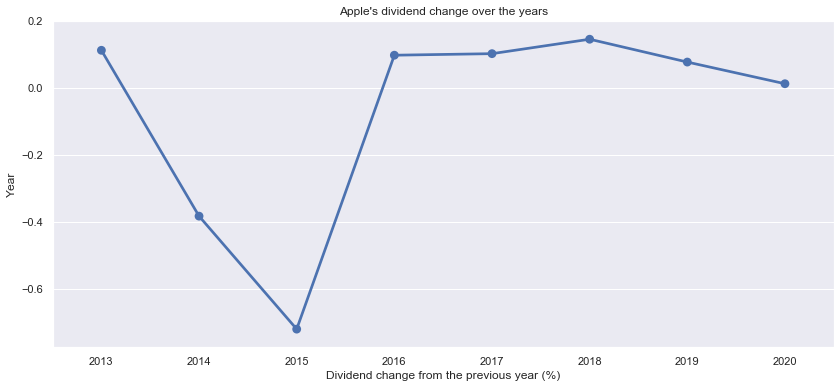

In [20]:
# Dividend change from previous year (%)

dividend_yearly = df.groupby(['year'])['dividend'].mean().pct_change()
dividend_yearly.dropna(inplace=True)


# plot dividend change (%) over years

plt.figure(figsize=(14,6))
sns.set(style = "darkgrid")
ax = sns.pointplot(dividend_yearly.index, dividend_yearly.values)
ax.set_ylabel("Year")
ax.set_xlabel("Dividend change from the previous year (%)")
plt.title("Apple's dividend change over the years")
plt.show()

- there is a dip noticed in 2014 also visible in sharp price drop suring this time. This will be investigated soon. Lately in 2018-2020, although there are increase in dividend but the raise from previous year have dropped.


# What happend in 2014?
- There is a sharp closing price fall seen in 2014. Let's look closely what triggered thi price fall 
- Apple's stock split happened three times in history, 2000, 2005 and 2014. When stock price croses 100 \\$, the company can decide to for stock split to keep the price down to accommodate more investor. In 2014, Apple's [rice soar to 600 \\$. Just after the stock split by a ratio of 7, price stabilized under 100 $ seen from the following figure
- Learn more about the Apple's stock slpit: https://www.cnet.com/news/dont-freak-out-heres-why-apples-stock-is-below-100/

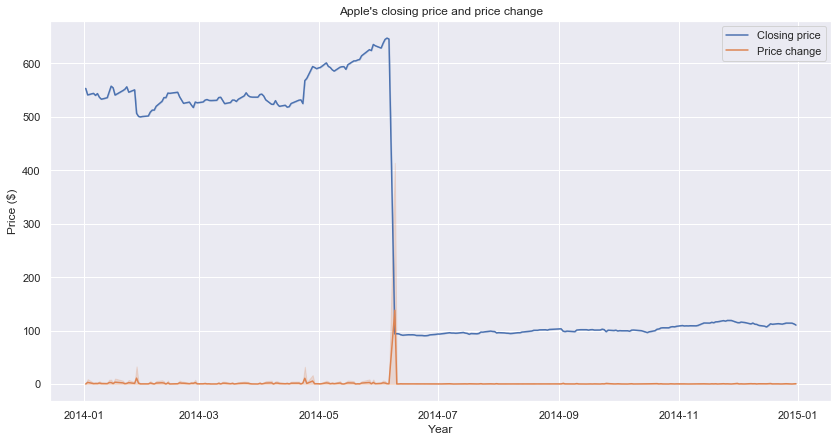

In [21]:
# Extract closing price and price change for the year 2014

df_2014 = df[(df.year >= 2014) & (df.year <= 2014) ]
df_2014.close_prev = df_2014.close.shift(1).fillna(method='bfill')
df_2014['change'] = abs(df_2014.close_prev-df_2014.close)
df_2014=df_2014[['close','change']].reset_index()

# plot closing price and price change for 2014

plt.figure(figsize=(14,7))
sns.set(style = "darkgrid")

ax = sns.lineplot(
    x='date', 
    y='value', 
    hue='variable', 
    data=pd.melt(df_2014, ['date']))

ax.set_ylabel("Price ($)")
ax.set_xlabel("Year")
ax.legend(labels=['Closing price', 'Price change'])
plt.title("Apple's closing price and price change")
plt.show()



# How the 2008 Recession Looked Like
- Economic recession in 2008 still fresh in the memory for many of us. Let's visualize how the stock's price evolved during that time
- In the history, it is known as 'Great recession and officially existed between (December 2007 - June 2009). Link: https://www.investopedia.com/articles/economics/08/past-recessions.asp

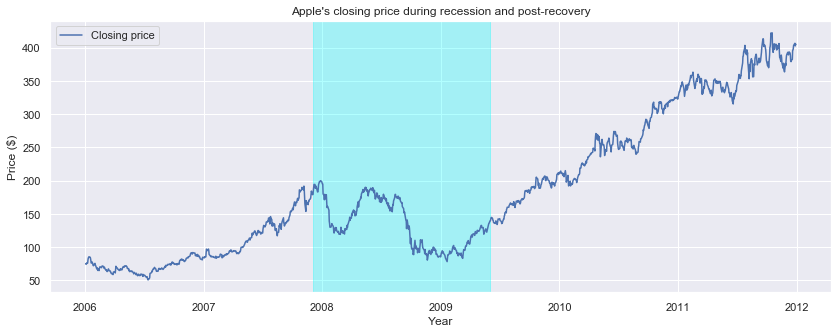

In [22]:
# Let's look at the closing price data for the recession time (2007 to 2009) and post-recovery ( to 2012) to see how the price evolved

df_recession = df['close'][(df.year >= 2006) & (df.year < 2012) ]
df_recession = df_recession.reset_index()


# plot closing price and price change for 2014

plt.figure(figsize=(14,5))
sns.set(style = "darkgrid")

ax = sns.lineplot(
    x='date', 
    y='close',  
    data = df_recession)

ax.set_ylabel("Price ($)")
ax.set_xlabel("Year")
ax.legend(labels=['Closing price', 'Price change'])
start = df_recession.date[df_recession.date >= '2007-12-01'].iloc[1]
end = df_recession.date[df_recession.date >= '2009-06-01'].iloc[1]
ax.axvspan(start, end, alpha=0.3, color='cyan',label='Recession')
plt.title("Apple's closing price during recession and post-recovery")
plt.show()


- Closely looking, right after the recession, the price sharply dropped, then upped a little bit in the middle of the year ended with drop again at the year end
- Just before the 'official recession end date', the price started to rise and kept on continuing till 2012

## Categorical data
- The dataframe has two categorical data, 'release_time' and 'qtr'
- 'qtr' information was utilised in the numerical data analysis above
- Let's look at the 'releas_time' data, that tells whether EPS was issued before or after the declaration date

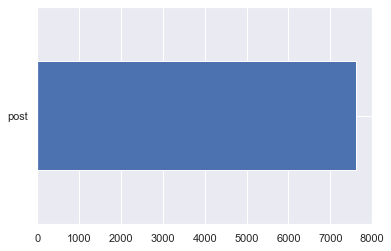

In [23]:
# release_time
df.release_time.value_counts().plot(kind='barh')
plt.show()

- For all Apple's share, earning was issued after the declaration time

# Anamolies & outliers 
- Stock price is very unpredictable and the data could have lots of variabilities
- In determining 'Anomalies' it would be a tough call to determine which data are outliers and which are not

<Figure size 432x288 with 0 Axes>

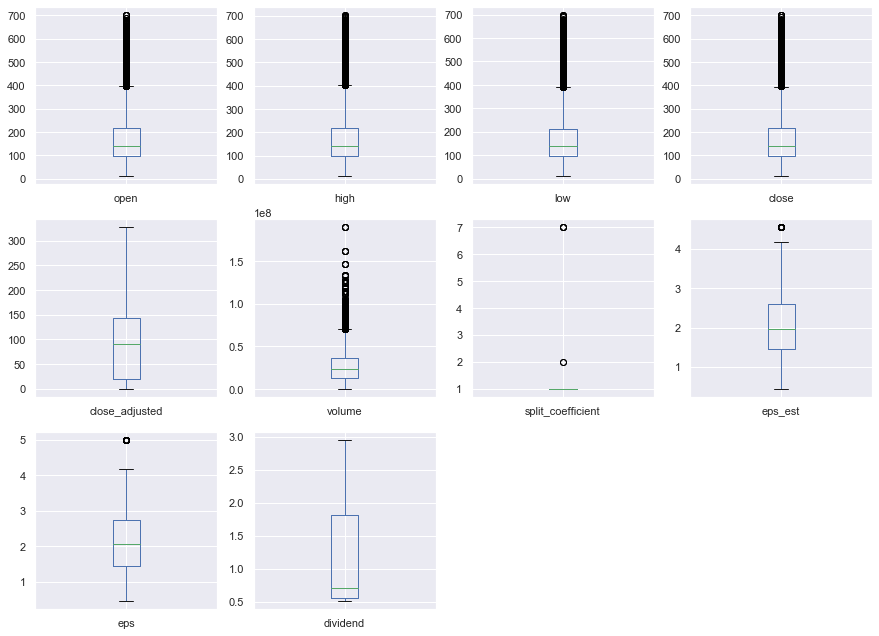

In [24]:
# Get the numerical data first

df_num=df.select_dtypes(exclude=['object','datetime64[ns]'])
df_num.drop(columns='year', inplace=True)

# box plot the numerical data

plt.figure()
df_num.plot.box(subplots = True,layout=(4,4), figsize=(15,15))
plt.show()


- Noticable and significant outliers were seen in the prices, volume and eps data

### How much Data is Outside of the Regular Range?
- Using 'inter quantile range' rule, (%) of anomolous data will be found out. If this amount is significant, high chances are these are the extreme cariations seen during recession and stock split times


In [25]:
# inter quartile range (IQR)

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

# Numerical data after removing outliers

df_num_OL=df_num[~((df_num < (Q1 - 1.5 * IQR)) |(df_num > (Q3 + 1.5 * IQR))).any(axis=1)]

# Calculate % of anomolous data

import operator
removed_obs = tuple(map(operator.sub, df_num.shape, df_num_OL.shape))
removed_obs
print('Anomalous data calculated (%):',100-(df_num_OL.shape[0]/df_num.shape[0])*100)

Anomalous data calculated (%): 19.588764457499536


- Which is quite significant. So this data will be kept

## Explore Data Relationships
- The dataframe contains many variables which have very similar patterns. e.g. all the prices have identical pattern seen in the first plot. There could be more. This will be explored in this section. Based on high degree of similarities, variables will be removed for cleaner dataset.

### 1. Pair plots

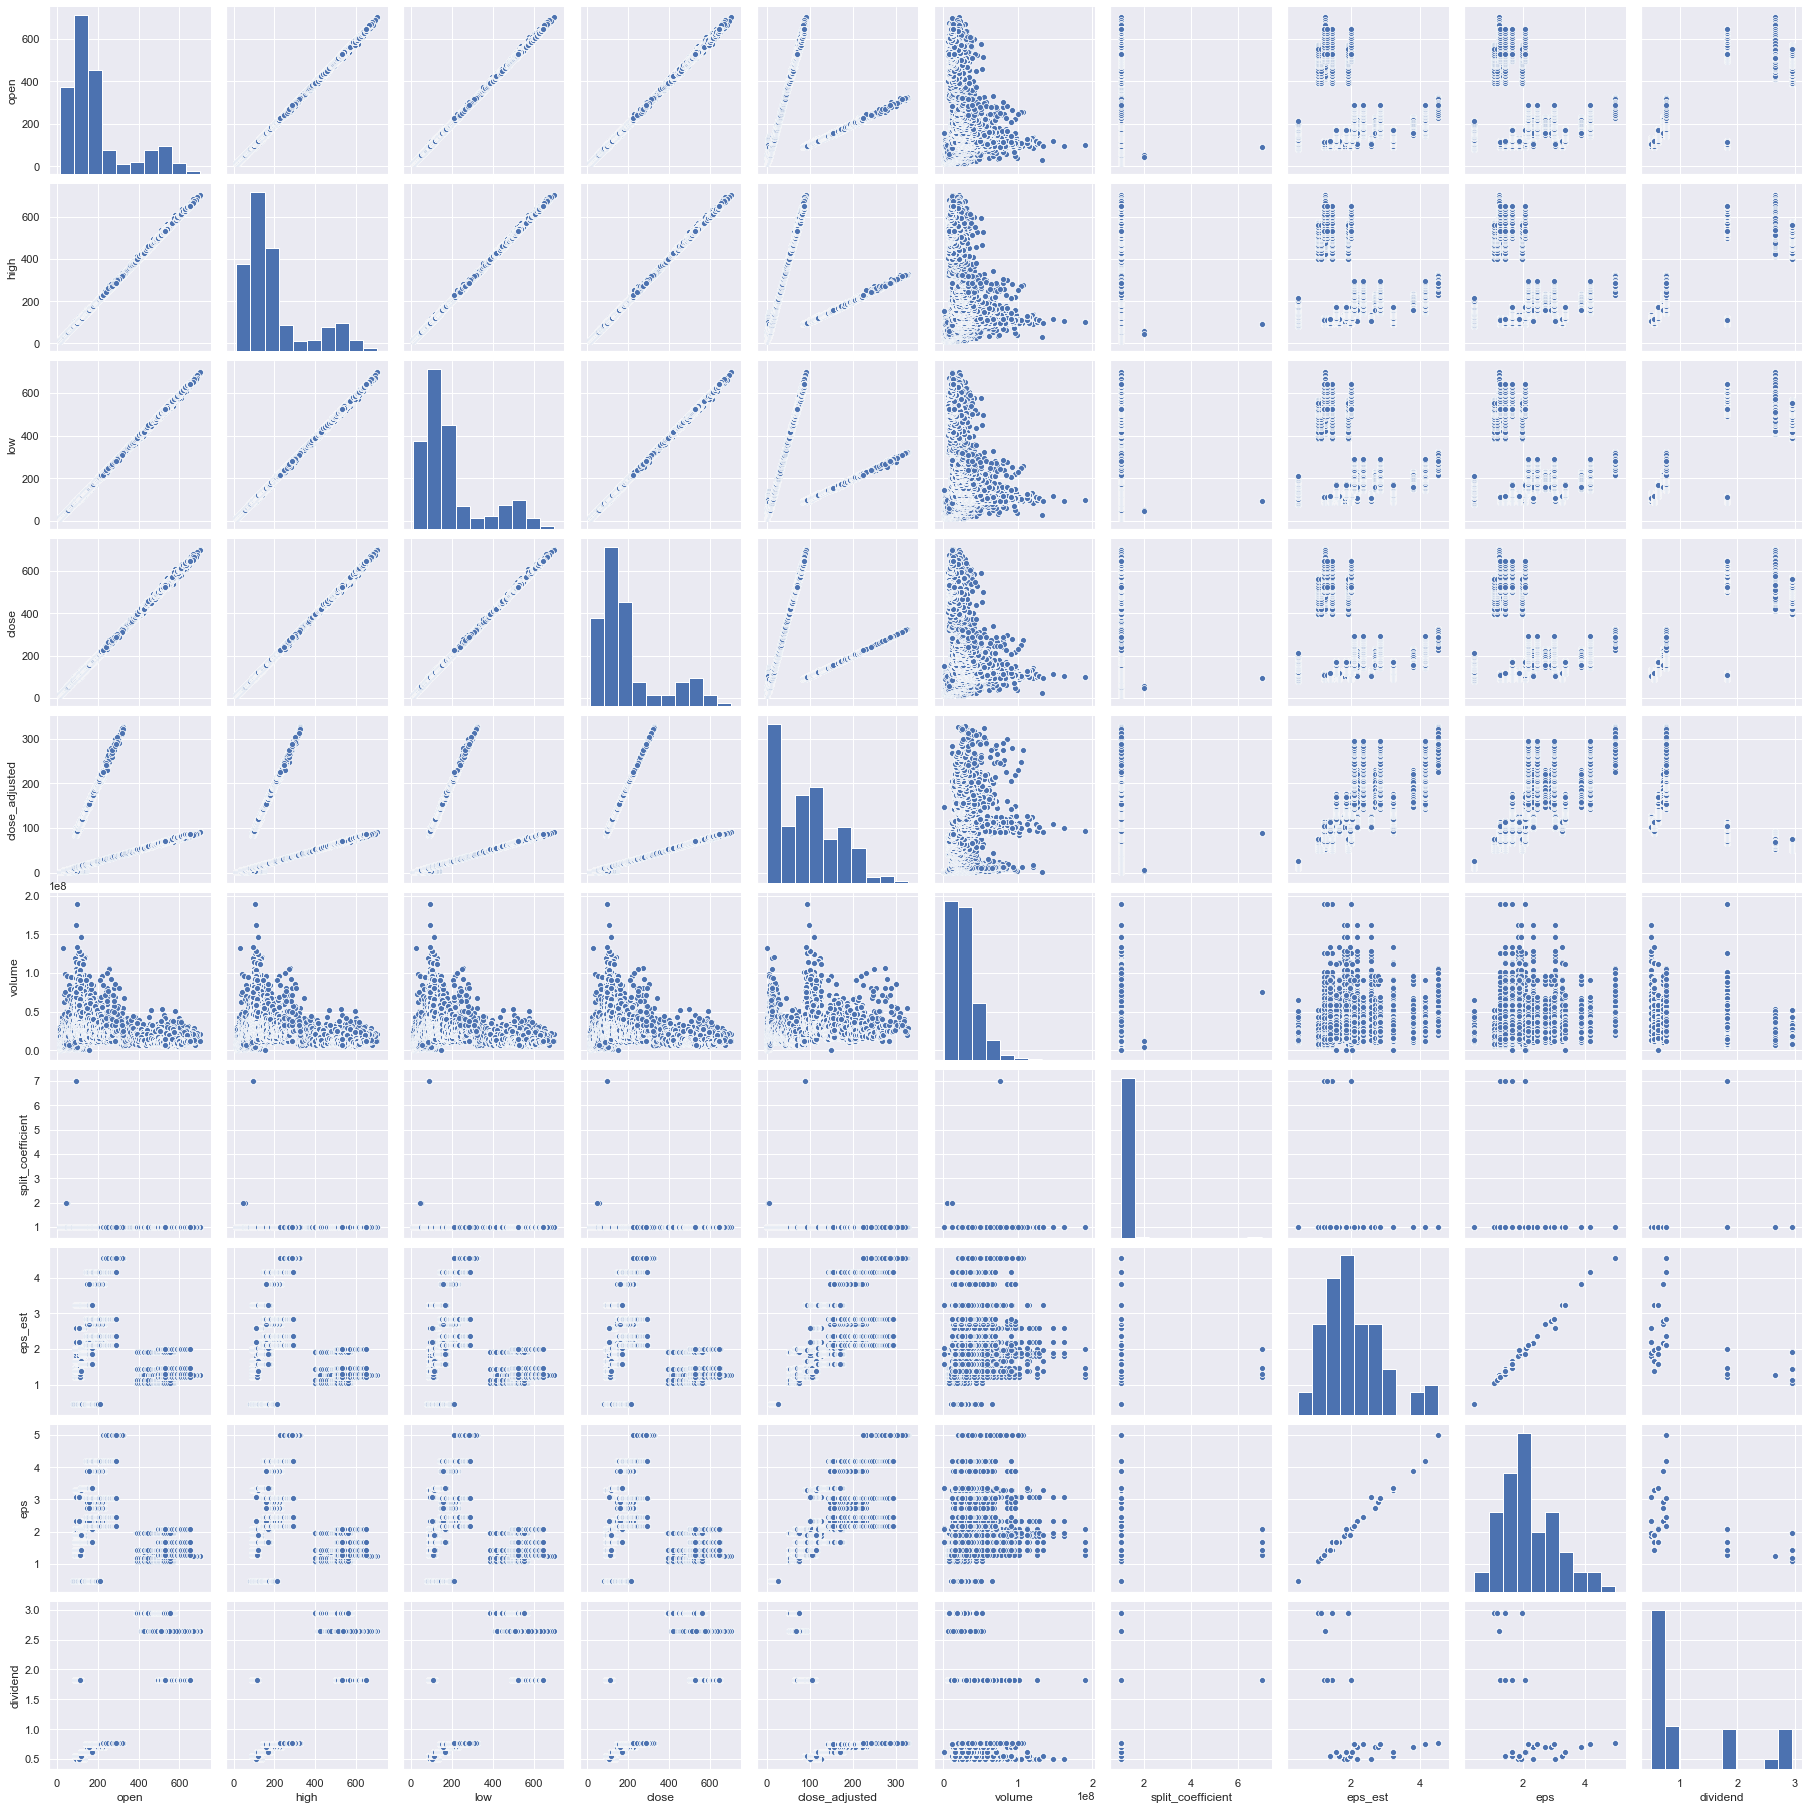

In [26]:
#Create a pairplot for all numeric variables
sns.pairplot(df_num,  palette='Set1')
plt.show()

- Visually seeing from the above pair plot, clearly many plots look like straight lines , meaning very similar. There are also other plots, where little or more patterns were seen
- To quantify degree of similarities, correlation heap map would be best option. Which will be done next

### 2. Correlation Heatmap
- Based on Pearson's correlation coefficient, the variables will be grouped into high, moderate and low similarities (https://www.statisticssolutions.com/pearsons-correlation-coefficient/#:~:text=High%20degree%3A%20If%20the%20coefficient,to%20be%20a%20small%20correlation.)

#### Highly Correlated Variables

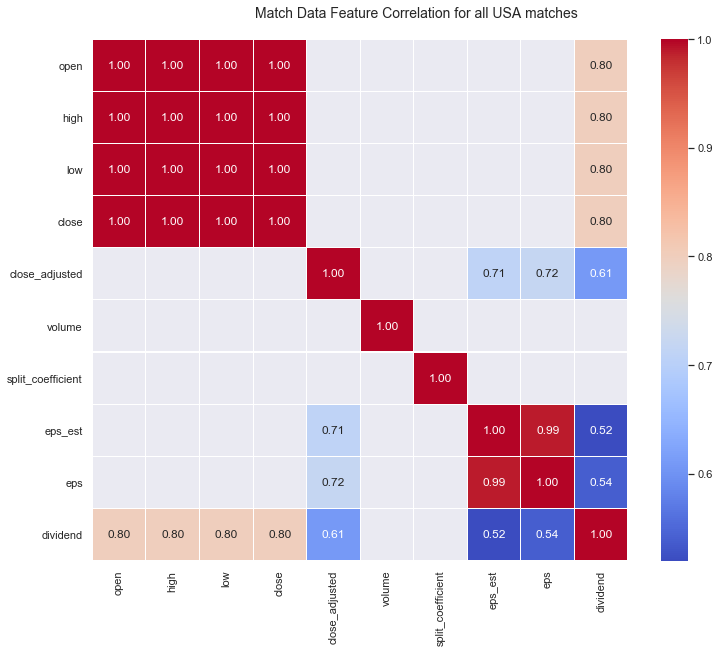

In [27]:
#correlation matrix for high correlation (>0.5)

corrmat = abs(df_num.corr())
corrmat=corrmat[corrmat>=.5]
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Match Data Feature Correlation for all USA matches', fontsize=14)

From high to low correlation found between:
- prices (close, high, low, open) ----- dividend (0.80). This tells there is a high chance when price goes up, dividend goes up too and vice versa  
- close adjusted ----- eps (0.72)
- close adjusted ----- dividend (0.61)
- eps ----- dividend (0.52)


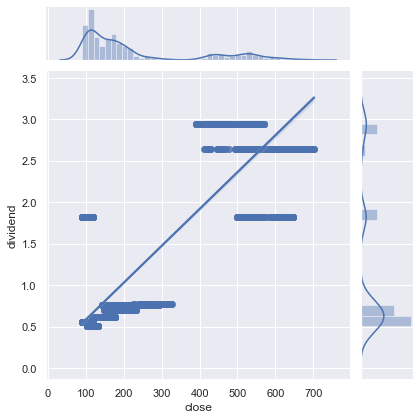

In [28]:
# Lets visualize close vs dividend--jointplot
sns.jointplot(x='close', y='dividend', data=df_num, kind="reg");

- Two indidiual data plot follows similar patter. So highly correlated

#### Moderately Correlated Variables


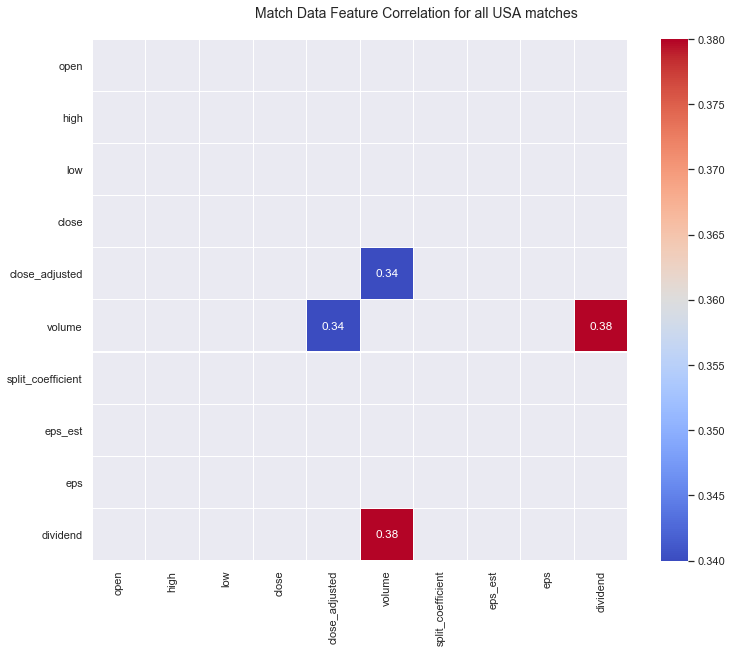

In [29]:
#correlation matrix for moderate correlation (<0.5 and >0.3)

corrmat = abs(df_num.corr())
corrmat=corrmat[(corrmat<.5) & (corrmat>=.3)]
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Match Data Feature Correlation for all USA matches', fontsize=14)

Moderately correlated variables from high to low:
- volume ----- dividend (0.38)
- volume ----- close adjusted (0.34)

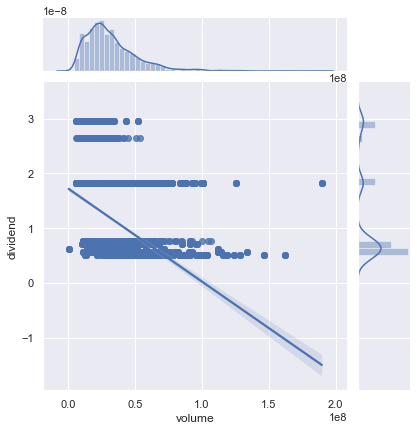

In [30]:
# Lets visualize volume vs dividend --jointplot
sns.jointplot(x='volume', y='dividend', data=df_num, kind="reg");

- More scattered than the previous jointpoint

#### Lowly Correlated Variables

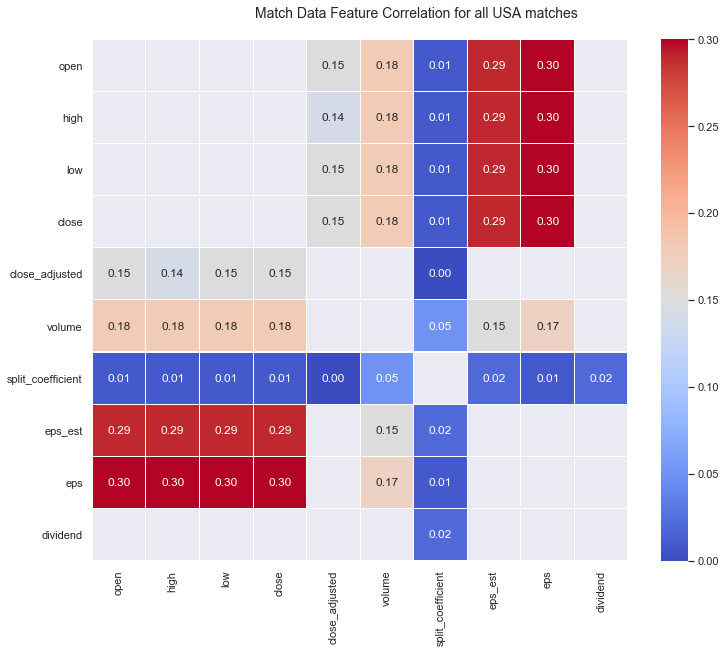

In [31]:
#correlation matrix for low correlation (<0.3)

corrmat = abs(df_num.corr())
corrmat=corrmat[(corrmat<.3)]
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Match Data Feature Correlation for all USA matches', fontsize=14)

Lowly correlated variables from high to low:
- prices ----- eps (0.30)
- prices ----- close adjusted (0.15)

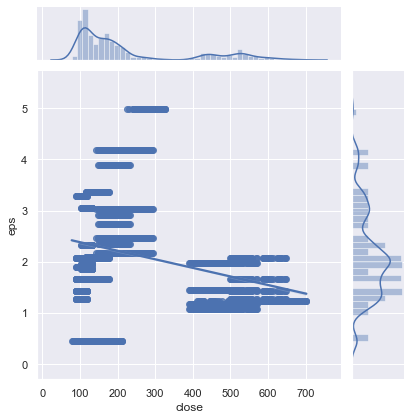

In [32]:
# Lets visualize price vs eps adjusted--jointplot
sns.jointplot(x='close', y='eps', data=df_num, kind="reg");

- very scattered data points

# Feature Removal and Save the Cleaned Data
- As the ultimate goal is to predict stock price based on historical data, only closing stock price data will be retained
- The low and moderate correlated features are needed when doing regression analysis

In [33]:
apple=df.filter(['close'])
apple.to_csv('data/apple_stockdata_EDA.csv')